<a href="https://colab.research.google.com/github/pratham5368/ThingsIhaveLearned/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow 2.0 Introduction
In this notebook you will be given an interactive introduction to TensorFlow 2.0. We will walk through the following topics within the TensorFlow module:

- TensorFlow Install and Setup
- Representing Tensors
- Tensor Shape and Rank
- Types of Tensors


If you'd like to follow along without installing TensorFlow on your machine you can use **Google Collaboratory**. Collaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

##Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```

![alt text](https://)If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

In [ ]:
import tensorflow as tf  # now import the tensorflow module
print(tf.version)  # make sure the version is 2.x

##Tensors
"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

They are multi-dimensional arrays that can hold numerical data of various types, such as integers, floats, and booleans.



It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape.

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.


In [ ]:
import tensorflow as tf

# Create a simple tensor
tensor_A = tf.constant([1, 2, 3])


###Creating Tensors

> Indented block

# > Indented block




Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

https://www.tensorflow.org/api_docs/python/tf/dtypes/DType?version=stable

In [ ]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

###Rank/Degree of Tensors
Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a *tensor of rank 0*, also known as a scalar.
```tf.rank``` — How many dimensions are in the tensor?

Now we'll create some tensors of higher degrees/ranks.

In [ ]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)

**To determine the rank** of a tensor we can call the following method.

In [ ]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The rank of a tensor is direclty related to the deepest level of nested lists. You can see in the first example ```["Test"]``` is a rank 1 tensor as the deepest level of nesting is 1.
Where in the second example ```[["test", "ok"], ["test", "yes"]]``` is a rank 2 tensor as the deepest level of nesting is 2.

###Shape of Tensors
Now that we've talked about the rank of tensors it's time to talk about the shape. The shape of a tensor is simply the number of elements that exist in each dimension. TensorFlow will try to determine the shape of a tensor but sometimes it may be unknown.```tf.shape``` — What are the dimensions/shape of the tensor?

To **get the shape** of a tensor we use the shape attribute.


In [ ]:
rank2_tensor.shape

###Changing Shape
The number of elements of a tensor is the product of the sizes of all its shapes. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.



The example below shows how to change the shape of a tensor.

In [ ]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,3]

# The numer of elements in the reshaped tensor MUST match the number in the original

Now let's have a look at our different tensors.

In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)
# Notice the changes in shape

###Size
```tf.shape``` — What are the dimensions/shape of the tensor?

In [ ]:
# How many elements are in the tensor? (e.g. 224*224*3 = 150528)
tensor_size = tf.size(tensor)


###Slicing Tensors
You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

When we slice or select elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value refrences a different dimension of the tensor.

Ex: ```tensor[dim1, dim2, dim3]```

I've included a few examples that will hopefully help illustrate how we can manipulate tensors with the slice operator.

In [ ]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

In [ ]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row2and4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)


###Types of Tensors
Before we go to far, I will mention that there are diffent types of tensors. These are the most used and we will talk more in depth about each as they are used.
- Variable
- Constant
- Placeholder
- SparseTensor

With the execption of ```Variable``` all these tensors are immuttable, meaning their value may not change during execution.

For now, it is enough to understand that we use the Variable tensor when we want to potentially change the value of our tensor.

Variables are tensors that can be modified during model training.

They are used to represent neural network model parameters, such as weights and biases.

These parameters can then be adjusted to better represent data.

For example, your tensors may start with random values to begin with but during training these random values get changed to be more aligned with ideal values that represent your data.


###Create Variables
Variable tensors are mutable (changable) tensors that store weights and biases in neural networks.

These are updated during neural network training to better represent the data a model is training on.

They can be created with ```tf.Variable```:

In [ ]:
variable = tf.Variable(initial_value)

###GradientTape
You can use ```tf.GradientTape``` to record operations on variables for automatic differentiation.

This is helpful for creating your own training loops with TensorFlow:



In [ ]:
with tf.GradientTape() as tape:
    # Operations involving variables
		gradients = tape.gradient(loss, [list_of_variables])


###Basic Math Operations
TensorFlow includes options for performing element-wise addition, subtraction, multiplication, and division:

In [ ]:
addition = tf.add(a, b)
subtraction = tf.subtract(a, b)
multiplication = tf.multiply(a, b)
division = tf.divide(a, b)


#Sources
Most of the information is taken direclty from the TensorFlow website which can be found below.

https://www.tensorflow.org/guide/tensor

#TensorFlow Core Learning Algorithms
In this notebook we will walk through 4 fundemental machine learning algorithms. We will apply each of these algorithms to unique problems and datasets before highlighting the use cases of each.

The algorithms we will focus on include:
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

It is worth noting that there are many tools within TensorFlow that could be used to solve the problems we will see below. I have chosen the tools that I belive give the most variety and are easiest to use.

##Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

*This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear*


###How it Works
Before we dive in, I will provide a very surface level explination of the linear regression algorithm.

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

Let's take an example of a data set with one feature and one label.



(0.0, 6.0, 0.0, 20.0)

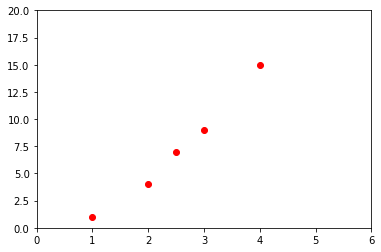

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

We can see that this data has a linear coorespondence. When the x value increases, so does the y. Because of this relation we can create a line of best fit for this dataset. In this example our line will only use one input variable, as we are working with two dimensions. In larger datasets with more features our line will have more features and inputs.

"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points." (https://www.investopedia.com/terms/l/line-of-best-fit.asp)

Here's a refresher on the equation of a line in 2D.

$ y = mx + b $

Here's an example of a line of best fit for this graph.



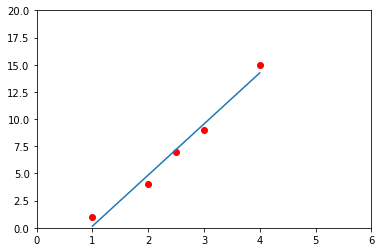

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Once we've generated this line for our dataset, we can use its equation to predict future values. We just pass the features of the data point we would like to predict into the equation of the line and use the output as our prediction.

### Setup and Imports
Before we get started we must install *sklearn* and import the following modules.

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

### Data
So, if you haven't realized by now a major part of machine learning is data! In fact, it's so important that most of what we do in this tutorial will focus on exploring, cleaning and selecting appropriate data.

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passanger on the ship. Our first step is always to understand the data and explore it. So, let's do that!

**Below we will load a dataset and learn how we can explore it using some built-in tools. **



In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

The ```pd.read_csv()``` method will return to us a new pandas *dataframe*. You can think of a dataframe like a table. In fact, we can actually have a look at the table representation.

We've decided to pop the "survived" column from our dataset and store it in a new variable. This column simply tells us if the person survived our not.

To look at the data we'll use the ```.head()``` method from pandas. This will show us the first 5 items in our dataframe.

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


And if we want a more statistical analysis of our data we can use the ```.describe()``` method.

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


And since we talked so much about shapes in the previous tutorial let's have a look at that too!

In [ ]:
dftrain.shape

(627, 9)

So have have 627 entries and 9 features, nice!

Now let's have a look at our survival information.

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Notice that each entry is either a 0 or 1. Can you guess which stands for survival?

**And now because visuals are always valuable let's generate a few graphs of the data.**

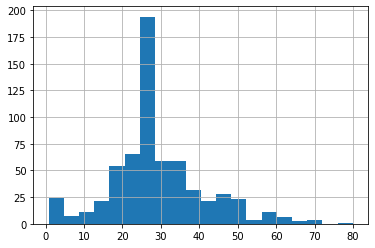

In [ ]:
dftrain.age.hist(bins=20)

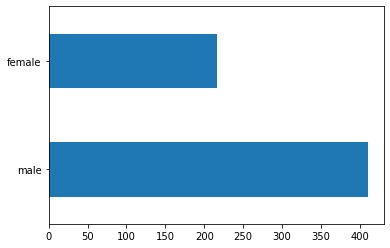

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

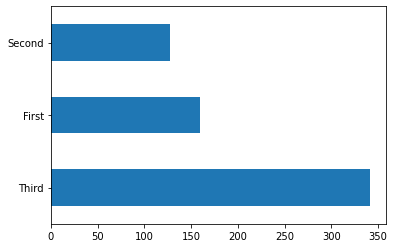

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

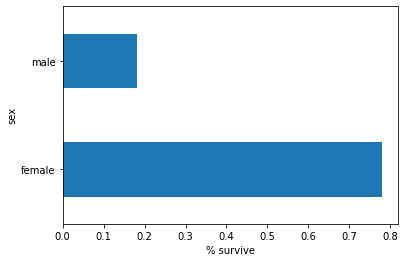

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

After analyzing this information, we should notice the following:
- Most passengers are in their 20's or 30's
- Most passengers are male
- Most passengers are in "Third" class
- Females have a much higher chance of survival



### Training vs Testing Data
You may have noticed that we loaded **two different datasets** above. This is because when we train models, we need two sets of data: **training and testing**.

The **training** data is what we feed to the model so that it can develop and learn. It is usually a much larger size than the testing data.

The **testing** data is what we use to evaulate the model and see how well it is performing. We must use a seperate set of data that the model has not been trained on to evaluate it. Can you think of why this is?

Well, the point of our model is to be able to make predictions on NEW data, data that we have never seen before. If we simply test the model on the data that it has already seen we cannot measure its accuracy accuratly. We can't be sure that the model hasn't simply memorized our training data. This is why we need our testing and training data to be seperate.



###Feature Columns
In our dataset we have two different kinds of information: **Categorical and Numeric**

Our **categorical data** is anything that is not numeric! For example, the sex column does not use numbers, it uses the words "male" and "female".

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2).

Fortunately for us TensorFlow has some tools to help!

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Let's break this code down a little bit...

Essentially what we are doing here is creating a list of features that are used in our dataset.

The cryptic lines of code inside the ```append()``` create an object that our model can use to map string values like "male" and "female" to integers. This allows us to avoid manually having to encode our dataframes.

*And here is some relevant documentation*

https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable



###The Training Process
So, we are almost done preparing our dataset and I feel as though it's a good time to explain how our model is trained. Specifically, how input data is fed to our model.

For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of **epochs**.

An **epoch** is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an **input function**. The input function simply defines how our dataset will be converted into batches at each epoch.





###Input Function
The TensorFlow model we are going to use requires that the data we pass it comes in as a ```tf.data.Dataset``` object. This means we must create a *input function* that can convert our current pandas dataframe into that object.

Below you'll see a seemingly complicated input function, this is straight from the TensorFlow documentation (https://www.tensorflow.org/tutorials/estimator/linear). I've commented as much as I can to make it understandble, but you may want to refer to the documentation for a detailed explination of each method.

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


###Creating the Model
In this tutorial we are going to use a linear estimator to utilize the linear regression algorithm.

Creating one is pretty easy! Have a look below.



In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpupqmt1yp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


###Training the Model
Training the model is as easy as passing the input functions that we created earlier.

In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7689394


And we now we have a model with a 74% accuracy (this will change each time)! Not crazy impressive but decent for our first try.

Now let's see how we can actually use this model to make predicitons.

We can use the ```.predict()``` method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set. Below we've used some pandas magic to plot a nice graph of the predictions.

As you can see the survival rate is not very high :/

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpupqmt1yp/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


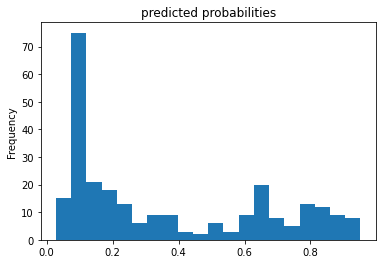

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

##Classification
Now that we've covered linear regression it is time to talk about classification. Where regression was used to predict a numeric value, classification is used to seperate data points into classes of different labels. In this example we will use a TensorFlow estimator to classify flowers.

Since we've touched on how estimators work earlier, I'll go a bit quicker through this example.

This section is based on the following guide from the TensorFlow website.
https://www.tensorflow.org/tutorials/estimator/premade




###Imports and Setup

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

###Dataset
This specific dataset seperates flowers into 3 different classes of species.
- Setosa
- Versicolor
- Virginica

The information about each flower is the following.
- sepal length
- sepal width
- petal length
- petal width

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


Let's have a look at our data.

In [ ]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Now we can pop the species column off and use that as our label.

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape  # we have 120 entires with 4 features

(120, 4)

###Input Function
Remember that nasty input function we created earlier. Well we need to make another one here! Fortunatly for us this one is a little easier to digest.

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


###Feature Columns
And you didn't think we forgot about the feature columns, did you?



In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


###Building the Model
And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.
- ```DNNClassifier``` (Deep Neural Network)
- ```LinearClassifier```

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.

So let's build a model!

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqaqtrlgy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


What we've just done is created a deep neural network that has two hidden layers. These layers have 30 and 10 neurons respectively. This is the number of neurons the TensorFlow official tutorial uses so we'll stick with it. However, it is worth mentioning that the number of hidden neurons is an arbitrary number and many experiments and tests are usually done to determine the best choice for these values. Try playing around with the number of hidden neurons and see if your results change.

###Training
Now it's time to train the model!

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)
# We include a lambda to avoid creating an inner function previously

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpqaqtrlgy/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.1511875, step = 0
INFO

###Evaluation
Now let's see how this trained model does!

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-19T18:22:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqaqtrlgy/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.20221s
INFO:tensorflow:Finished evaluation at 2020-06-19-18:22:08
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, averag

### Predictions
Now that we have a trained model it's time to use it to make predictions. I've written a little script below that allows you to type the features of a flower and see a prediction for its class.

In [ ]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 23
SepalLength: 12
SepalLength: 12
SepalLength: 3
SepalLength: 4
SepalLength: 2
SepalLength: 0.5
SepalWidth: 2
SepalWidth: 0.4
PetalLength: 0.5
PetalWidth: 0.3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqaqtrlgy/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (38.2%)


In [ ]:
# Here is some example input and expected classes you can try above
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

##Clustering
Now that we've covered regression and classification it's time to talk about clustering data!

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Unfortunalty there are issues with the current version of TensorFlow and the implementation for KMeans. This means we cannot use KMeans without writing the algorithm from scratch. We aren't quite at that level yet, so we'll just explain the basics of clustering for now.

####Basic Algorithm for K-Means.
- Step 1: Randomly pick K points to place K centroids
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

*Please refer to the video for an explanation of KMeans clustering.*

##Hidden Markov Models

"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution []. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

*This section is based on the following TensorFlow tutorial.* https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

###Data
Let's start by discussing the type of data we use when we work with a hidden markov model.

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

**States:** In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

**Observations:** Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: *On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.*

**Transitions:** Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: *a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.*

To create a hidden markov model we need.
- States
- Observation Distribution
- Transition Distribution

For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

###Imports and Setup

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Due to a version mismatch with tensorflow v2 and tensorflow_probability we need to install the most recent version of tensorflow_probability (see below).

In [ ]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

     |████████████████████████████████| 2.5MB 2.7MB/s 
ERROR: gym 0.17.2 has requirement cloudpickle<1.4.0,>=1.2.0, but you'll have cloudpickle 1.1.1 which is incompatible.


In [ ]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf

###Weather Model
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is
 normally distributed with mean and standard deviation 0 and 5 on
 a cold day and mean and standard deviation 15 and 10 on a hot day.

If you're unfamiliar with **standard deviation** it can be put simply as the range of expected values.

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.


In [ ]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

We've now created distribution variables to model our system and it's time to create the hidden markov model.

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the **expected temperatures** on each day we can do the following.

In [ ]:
mean = model.mean()

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[12.       11.1      10.83     10.748999 10.724699 10.71741  10.715222]


##Sources

1. Chen, James. “Line Of Best Fit.” Investopedia, Investopedia, 29 Jan. 2020, www.investopedia.com/terms/l/line-of-best-fit.asp.
2. “Tf.feature_column.categorical_column_with_vocabulary_list.” TensorFlow, www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable.
3. “Build a Linear Model with Estimators &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/estimator/linear.
4. Staff, EasyBib. “The Free Automatic Bibliography Composer.” EasyBib, Chegg, 1 Jan. 2020, www.easybib.com/project/style/mla8?id=1582473656_5e52a1b8c84d52.80301186.
5. Seif, George. “The 5 Clustering Algorithms Data Scientists Need to Know.” Medium, Towards Data Science, 14 Sept. 2019, https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68.
6. Definition of Hidden Markov Model, http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html.
7. “Tfp.distributions.HiddenMarkovModel &nbsp;: &nbsp; TensorFlow Probability.” TensorFlow, www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel.

#Introduction to Neural Networks
In this notebook you will learn how to create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called *keras*.

*This guide is based on the following TensorFlow documentation.*

https://www.tensorflow.org/tutorials/keras/classification




##Keras
Before we dive in and start discussing neural networks, I'd like to give a breif introduction to keras.

From the keras official documentation (https://keras.io/) keras is described as follows.

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU."

Keras is a very powerful module that allows us to avoid having to build neural networks from scratch. It also hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods.

In this guide we will use keras to quickly develop neural networks.



##What is a Neural Network
A neural network model is a collection of layers.
So, what are these magical things that have been beating chess grandmasters, driving cars, detecting cancer cells and winning video games?

A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Recall that in our core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction.



##How it Works
Before going into too much detail I will provide a very surface level explination of how neural networks work on a mathematical level. All the terms and concepts I discuss will be defined and explained in more detail below.

On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next (see below). These connections are defined by what we call a weight (some numeric value). Each layer also has something called a bias, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following.

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

The equation you just read is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We forgot a crucial part, **the activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function $F(x)$ is seen below.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Our network will start with predefined activation functions (they may be different at each layer) but random weights and biases. As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called **backpropagation** (explained below). Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions. We get these predictions by observing the values at our final layer, the output layer.




##Breaking Down The Neural Network!

Before we dive into any code lets break down how a neural network works and what it does.

![](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)
*Figure 1*




###Data
The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network, we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

Some common types of data a neural network uses are listed below.
- Vector Data (2D)
- Timeseries or Sequence (3D)
- Image Data (4D)
- Video Data (5D)

There are of course many different types or data, but these are the main categories.



###Layers
As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.


```
import tensorflow as tf

# Create a 2D convolutional layer with TensorFlow
conv_layer = tf.keras.layers.Conv2D()
```

####Input Layer
The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.
####Output Layer
The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.
####Hidden Layer(s)
All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.

The most straightforward way in TensorFlow to a neural network model us using the ```tf.keras.Sequential``` API, which allows you to stack layers in a way that the computation will be performed sequentially (one layer after the other):
```
# Create a basic neural network model with TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape),
    # Add layers here
		# Computation will happen layer by layer sequentially
])
```


####Neurons
Each layer is made up of what are called neurons. Neurons have a few different properties that we will discuss later. The important aspect to understand now is that each neuron is responsible for generating/holding/passing ONE numeric value.

This means that in the case of our input layer it will have as many neurons as we have input information. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels.

This also means that our output layer will have as many neurons as we have output information. The output is a little more complicated to understand so I'll refrain from an example right now but hopefully you're getting the idea.

But what about our hidden layers? Well these have as many neurons as we decide. We'll discuss how we can pick these values later but understand a hidden layer can have any number of neurons.
####Connected Layers
So how are all these layers connected? Well the neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways.

Take for example *Figure 1* (look above). Each neuron in one layer is connected to every neuron in the next layer. This is called a **dense** layer. There are many other ways of connecting layers but well discuss those as we see them.



###Weights
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

###Biases
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

###Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



###Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to start by discussing something called a cost/loss function.

####Loss/Cost Function
As we now know our neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

Loss functions are used to measure the difference between the predicted and true values in a machine learning problem.measures how wrong the model is (the higher the loss, the more wrong the model, so lower is better). Common loss values include ```tf.keras.losses.CategoricalCrossentropy``` for multi-class classification problems and ```tf.keras.losses.BinaryCrossentropy``` for binary classification problems.

The higher the loss value, the more wrong the model.

A model with a loss value of 0 is either:

Broken (because there has been a data leak and the model has seen data it was supposed to test on).
Perfect (it predicts the unseen data based on patterns its learn in the training data perfectly).

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

####Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

And that's all we really need to know for now. I'll direct you to the video for a more in depth explination.

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)



###Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above.
Optimizers are used to update the model parameters during training, based on the gradients of the loss function.

They are responsible for finding the optimal values of the model parameters that minimize the loss.

Optimizer = tries to adjust the models parameters to lower the loss value. Common optimizers include ```tf.keras.optimizers.SGD``` (Stochastic Gradient Descent) and tf.keras.optimizers.Adam. Each optimizer comes with generally good default settings, however, of the most important values to set is the learning_rate hyperparameter.


In essence, an optimizer will adjust the weights and bias values in a neural network’s layers to make sure the model’s patterns better match the input data.

Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

represented as ```tf.keras.optimizers``` objects, which can be customized or chosen from a wide range of built-in options.

*This article explains them quite well is where I've pulled this list from.*

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

###Callbacks
Callbacks are functions that are executed at various stages of training, allowing you to customize and monitor the training process.

They can be used to implement several helpful auxiliary functions to training such as:

- Early stopping — stop a model from training if it hasn’t improved in a certain amount of steps.
- Model checkpointing — save a model’s progress at specified points.
- Learning rate scheduling — adjust a model’s learning rate (to better facilitate learning) at programmatic intervals.

In TensorFlow, callbacks are represented as ```tf.keras.callbacks``` objects, which can be customized or chosen from a wide range of built-in options

###Data Augmentation
Data augmentation is a technique used in computer vision to increase the size and diversity of the training dataset, by applying transformations to the data, such as rotations, flips, and color shifts.

It can help to prevent overfitting (a model learning the patterns of the data too well) and improve the generalization of the model.

In TensorFlow, data augmentation can be implemented using various layers from tf.keras.layers, which provides a wide range of image transformations, such as:

```tf.keras.layers.Resizing``` — resize an image to a target size.

```tf.keras.layers.Rescaling``` — rescale an image to a target scale.

```tf.keras.layers.RandomFlip``` — randomly flip an image (horizontal or vertical).

##Creating a Neural Network
Okay now you have reached the exciting part of this tutorial! No more math and complex explinations. Time to get hands on and train a very basic neural network.

*As stated earlier this guide is based off of the following TensorFlow tutorial.*
https://www.tensorflow.org/tutorials/keras/classification


###Imports

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

Let's have a look at this data to see what we are working with.

In [ ]:
train_images.shape

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

Preprocessing layers include layers for:

- Text preprocessing such as ```tf.keras.layers.TextVectorization``` (turns text into numbers).
- Numerical features preprocessing such as ```tf.keras.layers.Normalization```.
- Categorical features preprocessing such as ```tf.keras.layers```.CategoryEncoding.
- Image preprocessing such as ```tf.keras.layers.Resizing``` to resize a batch of images to a target size.
You can also use tf.keras.layers to perform image data augmentation during training:




In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [ ]:
predictions = model.predict(test_images)

This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [ ]:
predictions[0]

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array.

In [ ]:
np.argmax(predictions[0])

And we can check if this is correct by looking at the value of the cooresponding test label.

In [ ]:
test_labels[0]

##Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals.

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


##Transfer Learning

###Load Image Pretrained Models with TensorFlow
You can find many image-based pretrained models in the ```tf.keras.applications``` API.

For example, to load a pre-trained TensorFlow model (e.g., MobileNetV2, a fast computer vision model which can run on mobile devices) without the top classification layer:

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
		input_shape=input_shape, # define input shape of your data
    include_top=False, # customize top layer to your own problem
		weights='imagenet') # model weights have been pretrained on ImageNet


### Load Text and Other Pretrained Models with TensorFlow Hub
There are many more models across different domains that can be loaded from TensorFlow Hub or tfhub.dev.

These include models for images, text, video, audio and more.

You can also load the models via the TensorFlow Python API or JavaScript API.

For example, the LEALLA (Lightweight language-agnostic sentence embedding model supporting 109 languages) is great for encoding text into numbers and then finding patterns in those numbers such as similarity matching (e.g. matching two pieces of text which are similar semantically rather than just string matching).

You can load it with:

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np

# Several sizes of model are available
encoder = hub.KerasLayer("https://tfhub.dev/google/LEALLA/LEALLA-small/1")
# encoder = hub.KerasLayer("https://tfhub.dev/google/LEALLA/LEALLA-base/1")
# encoder = hub.KerasLayer("https://tfhub.dev/google/LEALLA/LEALLA-large/1")

# Works for different languages
english_sentences = tf.constant(["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."])
italian_sentences = tf.constant(["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."])
japanese_sentences = tf.constant(["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"])

# Turn target texts into numbers
english_embeds = encoder(english_sentences)
japanese_embeds = encoder(japanese_sentences)
italian_embeds = encoder(italian_sentences)

# English-Italian similarity (how similar are the texts)
print(np.matmul(english_embeds, np.transpose(italian_embeds)))

# English-Japanese similarity (how similar are the texts)
print(np.matmul(english_embeds, np.transpose(japanese_embeds)))

# Italian-Japanese similarity (how similar are the texts)
print(np.matmul(italian_embeds, np.transpose(japanese_embeds)))


### Freeze Pretrained Model Layers
To preserve the patterns and weights learned by a pretrained model (to reuse them for your own problem), you can freeze them to stop them being updated during training:



In [ ]:
# Set layers in the pretrained_model to not update during training
pretrained_model.trainable = False

### Add Custom Layers and Train
With a frozen pretrained model, you can add your own custom layers on top:

In [ ]:
model = tf.keras.Sequential([
    pretrained_model, # frozen base model

		# Custom top layers take outputs from pretrained model and tailor to your
		# own problem
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(...)
model.fit(...)

## Custom Layers with TensorFlow
TensorFlow has plenty of in-built layers available via tf.keras.layers.

These will get you through 95% of your model creation.

However, sometimes you may want to create your own custom layer.

To do so, you can subclass the tf.keras.layers.Layer class (the class from which all other layers are built on) and implement:

__init__ — create all objects which are required for the layer (these are generally input-independent).
A build() method — setup all input-dependent variables for the layer.
A call() method — setup all steps in the forward computation (when you call the layer, what should it do to the inputs?).
For example, let’s create a layer which just adds 1 to all variables on the input:

In [ ]:
import tensorflow as tf

# Create all zeros tensor as input
x = tf.zeros(10)

# Create a layer which just adds 1 to all inputs
class MyCustomLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(MyCustomLayer, self).__init__()
        # Initialize layer attributes

    def build(self, input_shape):
        # Create layer weights (our layer doesn't use these)
        self.kernel = self.add_weight("kernel")

    def call(self, inputs):
        # Define the forward pass (what happens when you call the layer?)
        return inputs + 1 # add 1 to all inputs

# Create and use the layer
custom_layer = MyCustomLayer()
custom_layer(x)

>>> <tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>


## Custom models via Model Subclassing
Once you’ve created custom layers, you can stack them together using the Sequential API or the Functional API.

However, you may also want to combine them via your own custom model class.

You create your own custom model by subclassing tf.keras.Model.

A tf.keras.Model is just like a tf.keras.layers.Layer but with added functionality such as the fit(), evaluate() and save() methods.

Just like when creating a layer, you must define the call() method which defines the computation that happens when you call fit() on the model:


In [ ]:
# Create a custom model
class MyCustomModel(tf.keras.Model):
    def __init__(self, ...):
        super(MyCustomModel, self).__init__()
        # Initialize and create layers

		# call() defines what happens when you call fit() on the model
    def call(self, inputs, training=False):
        # Define the forward pass
        return ...

# Use your custom model
custom_model = MyCustomModel(...)


## Custom Loss Functions
The loss function measures how wrong a model’s predictions are.

The more wrong a model is, the higher the loss value will be.

TensorFlow has many in-built loss functions available in the tf.keras.losses API.

But if you’d like to create your own loss function, you can do so by subclassing tf.keras.losses.Loss (this is what all existing loss functions already do).

For example, if we wanted to recreate mean absolute error (MAE), we could do so with:

In [ ]:
# Create y_true and y_pred values
y_true = tf.ones(10)
y_pred = y_true * 2

# Create custom loss (recreate MAE)
class MeanAbsoluteError(tf.keras.losses.Loss):
  def call(self, y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_pred - y_true))

# Instantiate and use the custom loss value
mae_loss = MeanAbsoluteError()
mae_loss(y_true, y_pred)

>>> <tf.Tensor: shape=(), dtype=float32, numpy=1.0>

# Compile the model with the custom loss
model.compile(optimizer=optimizer,
						  loss=mae_loss,
							metrics=metrics)

##  Custom Metrics
A metric is a human-readable value to measure how right your model is performing.

For example, if a model achieved 99/100 correct predictions, you might say it had an accuracy of 99% (where accuracy is the metric of choice).

TensorFlow has a bunch of pre-built metrics for all kinds of different problems available in ```tf.keras.metrics```.

However, if you’d like to create your own custom metric, you can do so via subclassing ```tf.keras.metrics.Metric``` (the class all other existing TensorFlow metrics build on):

In [ ]:
# Create your own custom metric
class MyCustomMetric(tf.keras.metrics.Metric):
    def __init__(self, ...):
        super(MyCustomMetric, self).__init__()
        # Initialize metric attributes

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update the metric's state based on y_true and y_pred

    def result(self):
        # Compute and return the final result

    def reset_states(self):
        # Reset the metric's state

# Use your own custom metric
custom_metric = MyCustomMetric(...)

## Regularization
Because neural network models have incredible potential to learn patterns in data, they are prone to overfitting.

Overfitting is when a model learns patterns in a training dataset too well.

By too well, I mean it basically memorizes the patterns in the training set and doesn’t generalize to unseen data such as the test dataset.

Such as when a student learns the course materials (training data) very well but fails the final exam (testing data).

There are several techniques to prevent overfitting and these techniques are collectively known as regularization:

- Get more training data (more data means more opportunities for a model to learn diverse patterns).
- Add dropout (randomly remove connections in the network).
- Add weight decay or weight regularization (make sure the weights don’t get too close to the target data).
- Use data augmentation.
- Use batch normalization or layer normalization.


### Weight decay/regularization
You can add weight decay/regularization to a particular layer using L1 or L2 regularization via the tf.keras.regularizers API (see the TensorFlow documentation for more on each of these), let’s try L2 regularization:

In [ ]:
# Create the regularizer
l2_regularizer = tf.keras.regularizers.l2(l2=0.01)

# Add it to the layer
layer = tf.keras.layers.Dense(units,
															activation='relu',
															# Note: kernel is another word for "weight matrix"
													    kernel_regularizer=l2_regularizer)

### Dropout
Dropout is another common regularization technique which randomly sets a specified fraction of input values to zero.

The thought process here is that if a certain number (usually around 10-20%) of layer weights are set to zero, the remaining weights should be forced to be better representations of the data.

Dropout is usually placed after and in between layers and can be created via ```tf.keras.layers.Dropout```.

In [ ]:
# Create a dropout layer with a dropout rate of 10%
dropout_layer = tf.keras.layers.Dropout(rate=0.1)

## Hyperparameter Tuning in TensorFlow
Values that you can set yourself, such as the learning rate or number of units in a layer, of a machine learning model are known as hyperparameters.

While there are often good defaults for these values, knowing the absolute best values is impossible ahead of time.

The practice of finding the best values for these is known as hyperparameter tuning.

You can either run multiple experiments adjusting the values by hand.

Or you can write code to do it for you.

The Keras Tuner library allows you to programmtically tune the hyperparameters of your TensorFlow and Keras models.

The Keras Tuner library has four tuners available:

- RandomSearch
- Hyperband
- BayesianOptimization
- Sklearn
The documentation explains each of these in more detail, however, here is an example of using RandomSearch to tune the hidden units in the first layer and the learning rate of the optimizer:



In [ ]:
!pip install keras-tuner

import tensorflow as tf
imporkeras_tuner import RandomSearch

# Create dataset
(img_train, label_train), (img_test, label_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize dataset
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

# Define a model to tune the hyperparameters of
def build_model(hp):
    # Tune the values of the first dense layer between
    # 32 and 512
    units_choice = hp.Int('units',
                          min_value=32,
                          max_value=512,
                          step=32)

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten the inputs
        tf.keras.layers.Dense(units=units_choice, # these will be tuned
                              activation='relu'),
        tf.keras.layers.Dense(10,
                              activation='softmax')
    ])

    # Tune the learning rate to be one of:
    # 0.01, 0.001 or 0.0001
    learning_rate_choices = hp.Choice('learning_rate',
                                      values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_choices),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the tuner with RandomSearch
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5)

# Run the hyperparameter search
tuner.search(x=img_train,
             y=label_train,
             epochs=10,
             validation_data=(img_test,
                              label_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

### Mixed Precision Training in TensorFlow
The default datatype for computing in TensorFlow is float32.

However, lower-precision datatypes such as float16 can be used to speed up training (less precision means less numbers to compute on) without a significant loss to performance.

If your GPU has a compute capability score of 7.0 or higher, it can benefit from using mixed precision training.

TensorFlow enables automatic mixed precision training (e.g. it will allocate the float16 datatype to layers which are compatible with using it and will default to float32 when necessary) via the tensorflow.keras.mixed_precision API

In [ ]:
from tensorflow.keras import mixed_precision

# Set the global policy to use mixed precision where possible
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Note: when using mixed precision training, ensure the last
# layer has float32 output (for numerical stability)
model.add(tf.keras.layers.Activation('softmax', dtype='float32'))

# Train the model as usual and mixed precision will be applied where possible


### Gradient Accumulation in TensorFlow
Gradient accumulation can help when training on large batches that do not fit in memory.

For example, let’s say you have a large neural network which performs well but runs into memory issues when using a batch size of 32 (larger batch sizes generally enables better learning opportunities).

With gradient accumulation, you can simulate a larger batch size.

For example, you could run with a batch size of 32 but only update the gradients (perform the large computation) every 4 steps.

This effectively means you’re using a batch size of 8 (32/4) but getting the benefits of using a batch size of 32.

This code example shows how the forward pass, loss calculation and gradient calculation happens on the whole batch but the gradient updates only happen once every 4 steps:

In [ ]:
# Setup the optimizer and loss function as normal
optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_function = tf.keras.losses.CategoricalCrossentropy()

# Accumulate gradients and only update them every 4 steps
accumulation_steps = 4

# Create a tensor of zeros to store accumulated gradients
accumulated_gradients = [tf.zeros_like(var) for var in model.trainable_variables]

# Perform training loop
for epoch in range(epochs):
    for x_batch, y_batch in train_data:
        with tf.GradientTape() as tape:
            # Forward pass gets performed on the whole batch
            y_pred = model(x_batch, training=True)
            # Compute loss on the whole batch
            loss = loss_function(y_batch, y_pred)

        # Compute gradients on whole batch
        gradients = tape.gradient(loss, model.trainable_variables)
        accumulated_gradients = [acc_grad + grad for acc_grad, grad in zip(accumulated_gradients, gradients)]

				# Only *update* gradients if step threshold is True
        if step % accumulation_steps == 0:
						# Divide accumulated_gradients by number of steps
						accumulated_gradients = accumulated_graidents / accumulation_steps

            # Apply accumulated gradients
            optimizer.apply_gradients(zip(accumulated_gradients, model.trainable_variables))
            # Reset accumulated gradients
            accumulated_gradients = [tf.zeros_like(var) for var in model.trainable_variables]


### Track in-depth model performance with TensorFlow Profiler
The TensorFlow Profiler helps to track the performance of TensorFlow models down to finest the detail.

It helps you understand what operations (ops) are consuming what hardware resources (time and memory wise) and thus allows you to modify various parts which may be taking more time than necessary.

You can get started with the TensorFlow Profiler in several ways via the various profiling APIs:

Via the TensorBoard Keras Callback, tf.keras.callbacks.TensorBoard (shown below)
Via the ```tf.profiler``` Function API
Via the ```tf.profiler.experimental.Profile()``` context manager
The following is an example of using the TensorFlow Profiler with the TensorBoard Callback:

In [ ]:
!pip install -U tensorboard_plugin_profile

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

# Set up the log directory
log_dir = "logs"

# Enable the profiler in TensorBoard via callback
tensorboard_callback = TensorBoard(log_dir=log_dir,
																	 # Select which batches to profile
																	 profile_batch=(10, 20))

# Train the model with the TensorBoard callback
model.fit(x=x_train,
					y=y_train,
					epochs=10,
					batch_size=32,
					validation_data=(x_val, y_val),
					callbacks=[tensorboard_callback])


##  Distributed Training with TensorFlow
Distributed training involves training TensorFlow models across multiple GPUs, machines or TPUs.

This means you can take your existing code and run it at a larger scale and in turn create larger models and train on larger datasets.

TensorFlow allows for distributed training to take place via the tf.distribute.Strategy API.

There are several types of training strategy to use:

- Single machine, single GPU — this is the default strategy and does not require tf.distribute.Strategy.
- MirroredStrategy (tf.distribute.MirroredStrategy) — this mode supports synchronous distributed training on multiple GPUs on a single machine. Each variable is replicated across each GPU.
- TPUStrategy (tf.distribute.TPUStrategy) — this mode allows the running of TensorFlow code on Tensor Processing Units (TPUs). TPUs are Google’s custom chips designed for machine learning workflows.
- MultiWorkerMirroredStrategy (tf.distribute.MultiWorkerMirroredStrategy) — this mode allows for use of multiple machines with multiple GPUs (e.g. a cluster of 10 machines each with 8 GPUs).
See more in the TensorFlow distributed training documentation.
Let’s see an example of two distributed training options.

### MirroredStrategy (one machine with multiple GPUs)
```tf.distribute.MirroredStrategy``` is a synchronous training strategy that replicates the model and its variables across multiple GPUs on a single machine, for example, you may have 4 GPUs on a single machine:



In [ ]:
import tensorflow as tf

# Setup the training strategy
mirrored_strategy = tf.distribute.MirroredStrategy()

# Compile the model within the strategy context manager
with mirrored_strategy.scope():
    # Build and compile your model within the strategy scope
    model = create_model()
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model as usual
model.fit(x_train, y_train, epochs, batch_size, validation_data=(x_val, y_val))


### MultiWorkerMirroredStrategy (multiple machines, multiple GPUs)
tf.distributed.MultiWorkerMirroredStrategy extends MirroredStrategy for synchronous training across multiple machines, each with multiple GPUs:

In [ ]:
import tensorflow as tf

# Setup the training strategy
multi_worker_mirrored_strategy = tf.distribute.MultiWorkerMirroredStrategy()

# Compile the model within the strategy context manager
with multi_worker_mirrored_strategy.scope():
    # Build and compile your model within the strategy scope
    model = create_model()
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model as usual
model.fit(x_train, y_train, epochs, batch_size, validation_data=(x_val, y_val))


##Sources

1. Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

4. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

5. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.

#Deep Computer Vision

In this guide we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

##Image Data
So far, we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels

The only item in the list above you may not understand is **color channels**. The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)

Keep this in mind as we discuss how our network works and the input/output of each layer.



##Convolutional Neural Network
**Note:** I will use the term *convnet* and convolutional neural network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is.

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

*Let's have a look at how a densly connected layer would look at an image vs how a convolutional layer would.*

This is our image; the goal of our network will be to determine whether this image is a cat or not.
![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.
![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

Can you see why this might make these networks more useful?




###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it.

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present.



###Multiple Convolutional Layers
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





##Feature Maps
You may see me use the term *feature map* throughout this tutorial. This term simply stands for a 3D tensor with two spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that reprsents the prescence of spcific filters from the previous feature map. These are what we call *response maps*.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

Here's a great illustration from the book "Deep Learning with Python" by Francois Chollet (pg 124).
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)

####**Sample Size**
This isn't really the best term to describe this, but each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter.

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location.




##Borders and Padding
The more mathematical of you may have realized that if we slide a filter of let's say size 3x3 over our image well consider less positions for our filter than pixels in our input. Look at the example below.

*Image from "Deep Learning with Python" by Francois Chollet (pg 126).*
![alt text](https://drive.google.com/uc?export=view&id=1OEfXrV16NBjwAafgBfYYcWOyBCHqaZ5M)

This means our response map will have a slightly smaller width and height than our original image. This is fine but sometimes we want our response map to have the same dimensions. We can accomplish this by using something called *padding*.

**Padding** is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.

##Strides
In the previous sections we assumed that the filters would be slid continously through the image such that it covered every possible position. This is common but sometimes we introduce the idea of a **stride** to our convolutional layer. The stride size reprsents how many rows/cols we will move the filter each time. These are not used very frequently so we'll move on.

##Pooling
You may recall that our convnets are made up of a stack of convolution and pooling layers.

The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.

##Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [ ]:
model.summary()  # let's have a look at our model so far

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

##Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take much longer than previous models!*

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

##Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

##Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

###Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.



In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


###Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this.

In this section we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this techique we can train a very good classifier for a realtively small dataset (< 10,000 images). This is because the convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.



###Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features lile lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers than we can look for only features relevant to our very specific problem.



##Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/transfer_learning*




In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

###Dataset
We will load the *cats_vs_dogs* dataset from the modoule tensorflow_datatsets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.



In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will do that for us below.



In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using ```.map()```.

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Now if we look at the shape of an original image vs the new image we will see it has been changed.

In [ ]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).



In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.summary()

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [ ]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

###Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.



In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

###Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  



In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the predicition layer that will be a single dense neuron. We can do this because we only have two classes to predict for.




In [ ]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

###Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

In [ ]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

##Sources
1. “Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/cnn.
2. “Transfer Learning with a Pretrained ConvNet &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/transfer_learning.
3. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.



#Natural Language Processing using RNN
Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. A common example of NLP is something like spellcheck or autocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages.

###Recurrent Neural Networks

In this tutorial we will introduce a new kind of neural network that is much more capable of processing sequential data such as text or characters called a **recurrent neural network** (RNN for short).

We will learn how to use a reccurent neural network to do the following:
- Sentiment Analysis
- Character Generation

RNN's are complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.



## Sequence Data
In the previous tutorials we focused on data that we could represent as one static data point where the notion of time or step was irrelevant. Take for example our image data, it was simply a tensor of shape (width, height, channels). That data doesn't change or care about the notion of time.

In this tutorial we will look at sequences of text and learn how we can encode them in a meaningful way. Unlike images, sequence data such as long chains of text, weather patterns, videos and really anything where the notion of a step or time is relevant needs to be processed and handled in a special way.

But what do I mean by sequences and why is text data a sequence? Well that's a good question. Since textual data contains many words that follow in a very specific and meaningful order, we need to be able to keep track of each word and when it occurs in the data. Simply encoding say an entire paragraph of text into one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with. This is why we treat text as a sequence and process one word at a time. We will keep track of where each of these words appear and use that information to try to understand the meaning of peices of text.



##Encoding Text
As we know machine learning models and neural networks don't take raw text data as an input. This means we must somehow encode our textual data to numeric values that our models can understand. There are many different ways of doing this and we will look at a few examples below.

Before we get into the different encoding/preprocessing methods let's understand the information we can get from textual data by looking at the following two movie reviews.

```I thought the movie was going to be bad, but it was actually amazing!```

```I thought the movie was going to be amazing, but it was actually bad!```

Although these two setences are very similar we know that they have very different meanings. This is because of the **ordering** of words, a very important property of textual data.

Now keep that in mind while we consider some different ways of encoding our textual data.

###Bag of Words
The first and simplest way to encode our data is to use something called **bag of words**. This is a pretty easy technique where each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency. Have a look at the python function below that encodes a string of text into bag of words.

In [ ]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1

    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1

  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

This isn't really the way we would do this in practice, but I hope it gives you an idea of how bag of words works. Notice that we've lost the order in which words appear. In fact, let's look at how this encoding works for the two sentences we showed above.



In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

###Integer Encoding
The next technique we will look at is called **integer encoding**. This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words. This should hopefully fix the problem we saw before were we lost the order of words.


In [ ]:
vocab = {}
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ")
  encoding = []

  for word in words:
    if word in vocab:
      code = vocab[word]
      encoding.append(code)
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1

  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

And now let's have a look at one hot encoding on our movie reviews.

In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Much better, now we are keeping track of the order of words and we can tell where each occurs. But this still has a few issues with it. Ideally when we encode words, we would like similar words to have similar labels and different words to have very different labels. For example, the words happy and joyful should probably have very similar labels so we can determine that they are similar. While words like horrible and amazing should probably have very different labels. The method we looked at above won't be able to do something like this for us. This could mean that the model will have a very difficult time determing if two words are similar or not which could result in some pretty drastic performace impacts.



###Word Embeddings
Luckily there is a third method that is far superior, **word embeddings**. This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

This is the technique we will use for our examples and its implementation will be showed later on.



##Recurrent Neural Networks (RNN's)
Now that we've learned a little bit about how we can encode text it's time to dive into recurrent neural networks. Up until this point we have been using something called **feed-forward** neural networks. This simply means that all our data is fed forwards (all at once) from left to right through the network. This was fine for the problems we considered before but won't work very well for processing text. After all, even we (humans) don't process text all at once. We read word by word from left to right and keep track of the current meaning of the sentence so we can understand the meaning of the next word. Well this is exaclty what a recurrent neural network is designed to do. When we say recurrent neural network all we really mean is a network that contains a loop. A RNN will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.

This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.

Let's have a look at what a recurrent layer might look like.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)
*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

Let's define what all these variables stand for before we get into the explination.

**h<sub>t</sub>** output at time t

**x<sub>t</sub>** input at time t

**A** Recurrent Layer (loop)

What this diagram is trying to illustrate is that a recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.



##LSTM
The layer we dicussed in depth above was called a *simpleRNN*. However, there does exist some other recurrent layers (layers that contain a loop) that work much better than a simple RNN layer. The one we will talk about here is called LSTM (Long Short-Term Memory). This layer works very similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past. Whereas in our simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

For the purpose of this course we will refrain from going any further into the math or details behind how these layers work.



##Sentiment Analysis
And now time to see a recurrent neural network in action. For this example, we are going to do something called sentiment analysis.

The formal definition of this term from Wikipedia is as follows:

*the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.*

The example we’ll use here is classifying movie reviews as either postive, negative or neutral.

*This guide is based on the following tensorflow tutorial: https://www.tensorflow.org/tutorials/text/text_classification_rnn*



###Movie Review Dataset
Well start by loading in the IMDB movie review dataset from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.





In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

In [ ]:
# Lets look at one review
train_data[1]

###More Preprocessing
If we have a look at some of our loaded in reviews, we'll notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.

Luckily for us keras has a function that can do this for us:




In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

###Training
Now it's time to compile and train the model.

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

And we'll evaluate the model on our training data to see how well it performs.

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

###Making Predictions
Now let’s use our network to make predictions on our own reviews.

Since our reviews are encoded well need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.




In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)


In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]

print(decode_integers(encoded))

In [ ]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred)
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)


##RNN Play Generator

Now time for one of the coolest examples we've seen so far. We are going to use a RNN to generate a play. We will simply show the RNN an example of something we want it to recreate and it will learn how to write a version of it on its own. We'll do this using a character predictive model that will take as input a variable length sequence and predict the next character. We can use the model many times in a row with the output from the last predicition as the input for the next call to generate a sequence.


*This guide is based on the following: https://www.tensorflow.org/tutorials/text/text_generation*

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

###Dataset
For this example, we only need one peice of training data. In fact, we can write our own poem or play and pass that to the network for training if we'd like. However, to make things easy we'll use an extract from a shakesphere play.




In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

###Loading Your Own Data
To load your own data, you'll need to upload a file from the dialog below. Then you'll need to follow the steps from above but load in this new file instead.



In [ ]:
from google.colab import files
path_to_file = list(files.upload().keys())[0]

###Read Contents of File
Let's look at the contents of the file.

In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

In [ ]:
# Take a look at the first 250 characters in text
print(text[:250])

###Encoding
Since this text isn't encoded yet well need to do that ourselves. We are going to encode each unique character as a different integer.



In [ ]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [ ]:
# lets look at how part of our text is encoded
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

And here we will make a function that can convert our numeric values to text.


In [ ]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

###Creating Training Examples
Remember our task is to feed the model a sequence and have it return to us the next character. This means we need to split our text data from above into many shorter sequences that we can pass to the model as training examples.

The training examples we will prepapre will use a *seq_length* sequence as input and a *seq_length* sequence as the output where that sequence is the original sequence shifted one letter to the right. For example:

```input: Hell | output: ello```

Our first step will be to create a stream of characters from our text data.

In [ ]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

Next we can use the batch method to turn this stream of characters into batches of desired length.

In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Now we need to use these sequences of length 101 and split them into input and output.

In [ ]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [ ]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))

Finally we need to make training batches.

In [ ]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

###Building the Model
Now it is time to build the model. We will use an embedding layer a LSTM and one dense layer that contains a node for each unique character in our training data. The dense layer will give us a probability distribution over all nodes.

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

###Creating a Loss Function
Now we are going to create our own loss function for this problem. This is because our model will output a (64, sequence_length, 65) shaped tensor that represents the probability distribution of each character at each timestep for every sequence in the batch.



In [ ]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

In [ ]:
# we can see that the predicition is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(example_batch_predictions)

In [ ]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

In [ ]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

In [ ]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

So now we need to create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were.

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

###Compiling the Model
At this point we can think of our problem as a classification problem where the model predicts the probabillity of each unique letter coming next.


In [ ]:
model.compile(optimizer='adam', loss=loss)

###Creating Checkpoints
Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

###Training
Finally, we will start training the model.

**If this is taking a while go to Runtime > Change Runtime Type and choose "GPU" under hardware accelerator.**



In [ ]:
history = model.fit(data, epochs=50, callbacks=[checkpoint_callback])

###Loading the Model
We'll rebuild the model from a checkpoint using a batch_size of 1 so that we can feed one peice of text to the model and have it make a prediction.

In [ ]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

Once the model is finished training, we can find the **lastest checkpoint** that stores the models weights using the following line.



In [ ]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

We can load **any checkpoint** we want by specifying the exact file to load.

In [ ]:
checkpoint_num = 10
model.load_weights(tf.train.load_checkpoint("./training_checkpoints/ckpt_" + str(checkpoint_num)))
model.build(tf.TensorShape([1, None]))

###Generating Text
Now we can use the lovely function provided by tensorflow to generate some text using any starting string we'd like.

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension

      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

##Sources

1. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.
2. “Text Classification with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_classification_rnn.
3. “Text Generation with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_generation.
4. “Understanding LSTM Networks.” Understanding LSTM Networks -- Colah's Blog, https://colah.github.io/posts/2015-08-Understanding-LSTMs/.

##Reinforcement Learning
The next and final topic in this course covers *Reinforcement Learning*. This technique is different than many of the other machine learning techniques we have seen earlier and has many applications in training agents (an AI) to interact with enviornments like games. Rather than feeding our machine learning model millions of examples we let our model come up with its own examples by exploring an enviornemt. The concept is simple. Humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same.



###Terminology
Before we dive into explaining reinforcement learning we need to define a few key peices of terminology.

**Enviornemt** In reinforcement learning tasks we have a notion of the enviornment. This is what our *agent* will explore. An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

**Agent** an agent is an entity that is exploring the enviornment. Our agent will interact and take different actions within the enviornment. In our mario example the mario character within the game would be our agent.

**State** always our agent will be in what we call a *state*. The state simply tells us about the status of the agent. The most common example of a state is the location of the agent within the enviornment. Moving locations would change the agents state.

**Action** any interaction between the agent and enviornment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current *state* of the agent. In fact, the act of doing nothing is an action as well! The action of say not pressing a key if we are using our mario example.

**Reward** every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an enviornment. Sometimes the reward will be clear, for example if an agent performs an action which increases their score in the enviornment we could say they've recieved a positive reward. If the agent were to perform an action which results in them losing score or possibly dying in the enviornment then they would recieve a negative reward.

The most important part of reinforcement learning is determing how to reward the agent. After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropiatly such that it reaches the desired goal.



###Q-Learning
Now that we have a vague idea of how reinforcement learning works it's time to talk about a specific technique in reinforcement learning called *Q-Learning*.

Q-Learning is a simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values. This matrix is often reffered to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n, m] represents the agents expected reward given they are in state n and take action m. The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state. The idea is that after a succesful training/learning of this Q-Table/matrix we can determine the action an agent should take in any state by looking at that states row in the matrix and taking the maximium value column as the action.

**Consider this example.**

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

| A1  | A2  | A3  | A4  |
|:--: |:--: |:--: |:--: |
|  0  |  0  | 10  |  5  |
|  5  | 10  |  0  |  0  |
| 10  |  5  |  0  |  0  |

If that was our Q-Table/matrix then the following would be the preffered actions in each state.

> State 1: A3

> State 2: A2

> State 3: A1

We can see that this is because the values in each of those columns are the highest for those states!



###Learning the Q-Table
So that's simple, right? Now how do we create this table and find those values. Well this is where we will dicuss how the Q-Learning algorithm updates the values in our Q-Table.

I'll start by noting that our Q-Table starts of with all 0 values. This is because the agent has yet to learn anything about the enviornment.

Our agent learns by exploring the enviornment and observing the outcome/reward from each action it takes in each state. But how does it know what action to take in each state? There are two ways that our agent can decide on which action to take.
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Near the beginning of our agents learning it will mostly take random actions in order to explore the enviornment and enter many different states. As it starts to explore more of the enviornment it will start to gradually rely more on it's learned values (Q-Table) to take actions. This means that as our agent explores more of the enviornment it will develop a better understanding and start to take "correct" or better actions more often. It's important that the agent has a good balance of taking random actions and using learned values to ensure it does get trapped in a local maximum.

After each new action our agent wil record the new state (if any) that it has entered and the reward that it recieved from taking that action. These values will be used to update the Q-Table. The agent will stop taking new actions only once a certain time limit is reached or it has acheived the goal or reached the end of the enviornment.

####Updating Q-Values
The formula for updating the Q-Table after each action is as follows:
> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

- $\alpha$ stands for the **Learning Rate**

- $\gamma$ stands for the **Discount Factor**

####Learning Rate $\alpha$
The learning rate $\alpha$ is a numeric constant that defines how much change is permitted on each QTable update. A high learning rate means that each update will introduce a large change to the current state-action value. A small learning rate means that each update has a more subtle change. Modifying the learning rate will change how the agent explores the enviornment and how quickly it determines the final values in the QTable.

####Discount Factor $\gamma$
Discount factor also know as gamma ($\gamma$) is used to balance how much focus is put on the current and future reward. A high discount factor means that future rewards will be considered more heavily.

<br/>
<p>To perform updates on this table we will let the agent explpore the enviornment for a certain period of time and use each of its actions to make an update. Slowly we should start to notice the agent learning and choosing better actions. </p>



##Q-Learning Example
For this example we will use the Q-Learning algorithm to train an agent to navigate a popular enviornment from the [Open AI Gym](https://gym.openai.com/). The Open AI Gym was developed so programmers could practice machine learning using unique enviornments. Intersting fact, Elon Musk is one of the founders of OpenAI!

Let's start by looking at what Open AI Gym is.

In [ ]:
import gym   # all you have to do to import and use open ai gym!

Once you import gym you can load an enviornment using the line ```gym.make("enviornment")```.

In [ ]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

There are a few other commands that can be used to interact and get information about the enviornment.

In [ ]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

In [ ]:
env.reset()  # reset enviornment to default state

In [ ]:
action = env.action_space.sample()  # get a random action

In [ ]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [ ]:
env.render()   # render the GUI for the enviornment

###Frozen Lake Enviornment
Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The enviornment we loaded above ```FrozenLake-v0``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:
- 16 states (one for each square)
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)



###Building the Q-Table
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
Q

###Constants
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [ ]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

###Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###Updating Q Values
The code below implements the formula discussed above.

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

###Putting it Together
Now that we know how to do some basic things we can combine these together to create our Q-Learning algorithm,

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

##Sources
1. Violante, Andre. “Simple Reinforcement Learning: Q-Learning.” Medium, Towards Data Science, 1 July 2019, https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56.

2. Openai. “Openai/Gym.” GitHub, https://github.com/openai/gym/wiki/FrozenLake-v0.

# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.

## How you can use this notebook

You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.12.0
Notebook last run (end-to-end): 2023-05-07 23:10:01.302908


## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

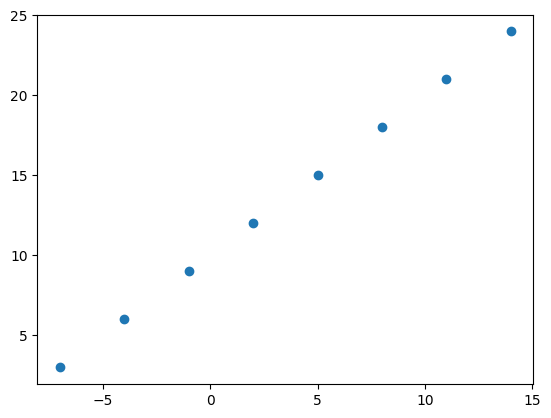

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

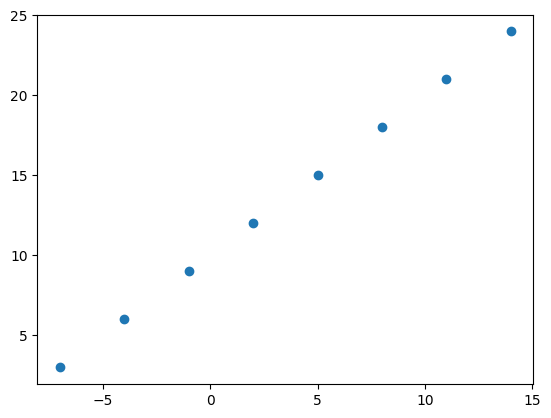

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 19.2976 - mae: 19.2976
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 19.0164 - mae: 19.0164
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 18.7351 - mae: 18.7351
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 18.4539 - mae: 18.4539
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 18.1726 - mae: 18.1726


Boom!

We've just trained a model to figure out the patterns between `X` and `y`.

How do you think it went?

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

What do you think the outcome should be if we passed our model an `X` value of 17.0?

In [ ]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 115ms/step


array([[-16.701845]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

> 🤔 **Question:** What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 604ms/step - loss: 12.9936 - mae: 12.9936
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.8611 - mae: 12.8611
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7286 - mae: 12.7286
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.5961 - mae: 12.5961
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 12.4636 - mae: 12.4636
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3311 - mae: 12.3311
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 12.1986 - mae: 12.1986
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 12.0661 - mae: 12.0661
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9336 - mae: 11.9336
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8011 - mae: 11.8011
Epoch 11/100
1/1 [==============================

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [ ]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

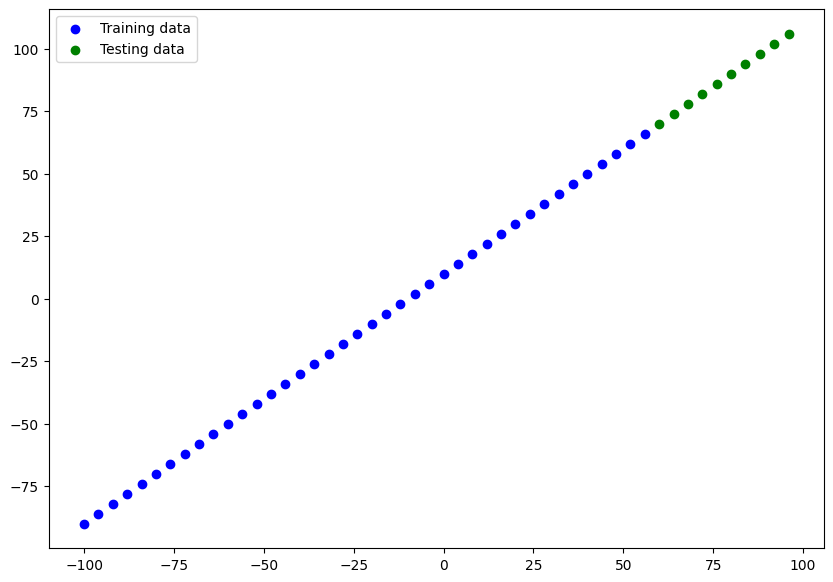

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [ ]:
# View the predictions
y_preds

array([[44.544697],
       [47.427135],
       [50.309574],
       [53.192013],
       [56.07445 ],
       [58.95689 ],
       [61.839325],
       [64.72176 ],
       [67.60421 ],
       [70.48664 ]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

> 🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

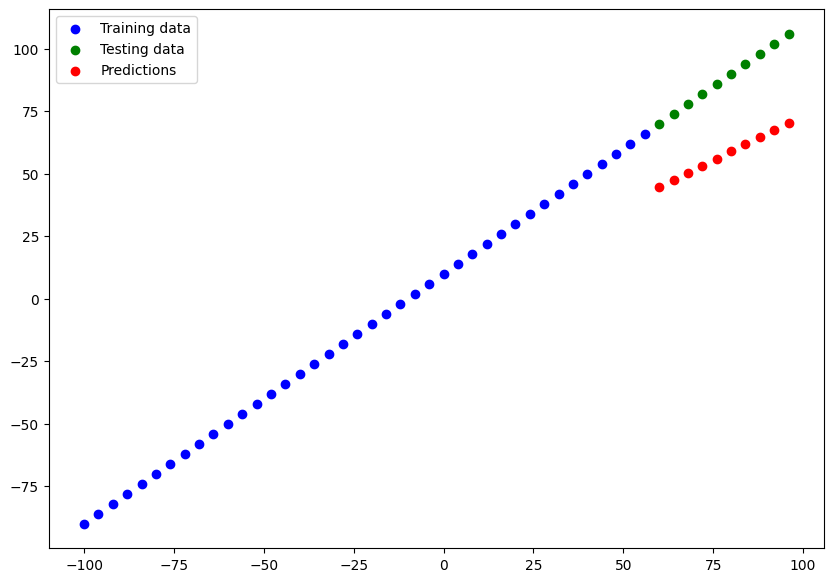

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 30.4843 - mae: 30.4843


[30.484329223632812, 30.484329223632812]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.455303, 40.572865, 37.690426, 34.807987, 31.925549, 29.04311 ,
       26.160675, 23.278236, 20.39579 , 17.610687], dtype=float32)>

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[44.544697],
       [47.427135],
       [50.309574],
       [53.192013],
       [56.07445 ],
       [58.95689 ],
       [61.839325],
       [64.72176 ],
       [67.60421 ],
       [70.48664 ]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), it'll remove the the `1` dimension from our `y_preds` tensor, making it the same shape as `y_test`.

> 🔑 **Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, *many* errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [ ]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([44.544697, 47.427135, 50.309574, 53.192013, 56.07445 , 58.95689 ,
        61.839325, 64.72176 , 67.60421 , 70.48664 ], dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tenors the same shape, let's use our evaluation metrics.

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.48433>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=30.484329986572266>

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 19ms/step - loss: 30.0988 - mae: 30.0988
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4388 - mae: 8.4388
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5960 - mae: 10.5960
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1312 - mae: 13.1312
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1970 - mae: 12.1970
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4357 - mae: 9.4357
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5754 - mae: 8.5754
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0484 - mae: 9.0484
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7568 - mae: 18.7568
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1199 - mae: 10.1199
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 45ms/step


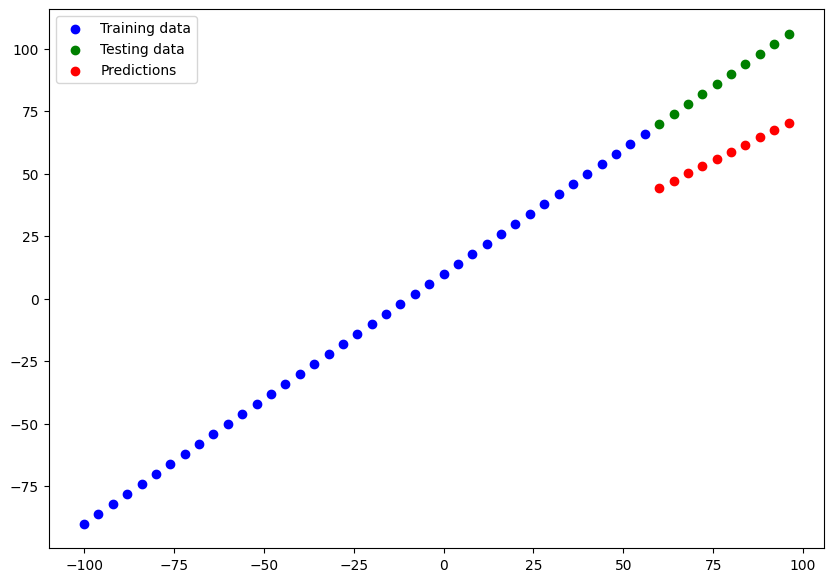

In [ ]:
2# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.638134, 949.13086)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 51ms/step


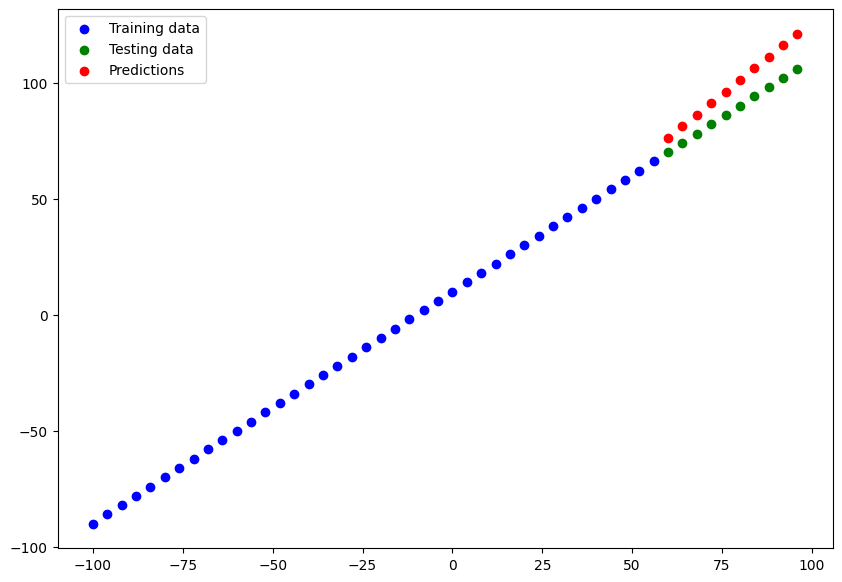

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

Woah, that's looking better already! And all it took was an extra layer.

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.610324, 120.35542)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 55ms/step


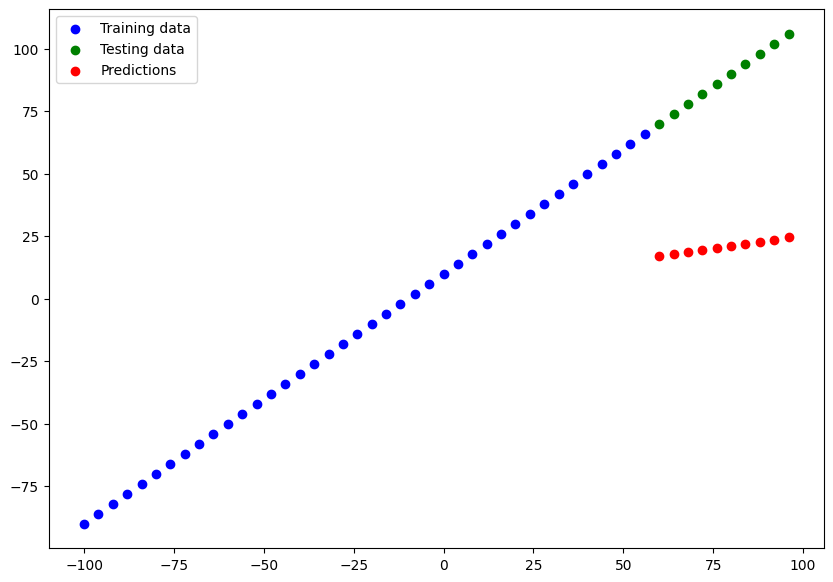

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.224594, 4601.822)

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.638134,949.130859
1,model_2,10.610324,120.355423
2,model_3,67.224594,67.224594


## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

add more from
https://github.com/mrdbourke/tensorflow-deep-learning/tree/main

https://dev.mrdbourke.com/tensorflow-deep-learning/